# Load Python Packages

Load the required packages as follows

In [1]:
import numpy as np
from numpy.linalg import inv, norm
from scipy.sparse.linalg import cg
from sklearn import metrics

# Load functions useful for COMBSS

First make sure that the file 'combss_functions_github.py' is stored the working directory. Then load the all the COMBSS related functions by running the following command.

In [2]:
from combss_functions_github import *

# Generate data from a true model

Generate a low-dimensional dataset as follows.

In [3]:
n = 100
p = 20
beta_type = 1
K0 = 10
beta0, model0 = gen_beta0(p, K0, beta_type)

snr = 6              
rho = 0.5 

meanX = np.zeros(p)
covX = cov_X(p, rho)
noise_var = beta0.T@covX@beta0/snr

np.random.seed(123)

data_train = gen_data(n, p, meanX, covX, noise_var, beta0)
X_train = data_train[0]
y_train = data_train[1]

# Generate a validation set

For tuning the penalty parameter $\lambda$, we generate a validation set as follows. 

In [4]:
n_test = 5000

data_test = gen_data(n_test, p, meanX, covX, noise_var, beta0)
X_test = data_test[0]
y_test = data_test[1]

# Define parameters for COMBSS

Now define the parameters of COMBSS algorithm. Recall 
- $\alpha$ is the learning rate of the gradient descent (GD) method;
- $\tau$ is the paramter used to map the final $\mathbf t$ vector to a binary vector $\mathbf s$;
- $\eta$ is the parameter used for speed improvement using truncation approach; 

In [5]:
alpha = 0.1           
tau = 0.5
eta = 0.001

# Parameters for termination of the gradient descent
gd_tol = 0.001           # gd_tol is the tolerance of the GD method for termination.

epoch = 10               # GD terminates if the Term_cond is satisfied over epoch number of consecutive iterations.

gd_maxiter = 1000         # max number of iterations allowed by the GD method. 
                         # This is not crucial as the algorithm terminates 
                         # with smaller number ietartions

# Generate a grid of $\lambda$ values

Following command generates a grid of $\lambda$ values as described in the paper.

In [6]:
lam_grid = gen_lam_grid_exp(y_train, 50, 0.8)

In [7]:
#%%
ADAM = True
cg_tol = 0.001
cg_maxiter = n

In [8]:
t_list, s_list, mse_arr = combss_mse(X_train, y_train, X_test, y_test, lam_grid, ADAM=ADAM, tau=tau, eta=eta, epoch=epoch, gd_maxiter=gd_maxiter, gd_tol=gd_tol, cg_maxiter=cg_maxiter, cg_tol=cg_tol )


Optimal lam: 0.10658755302227893
Optimal model: [ 0  2  4  6  8 10 12 14 16 18] (size: 10)
Optimal MSE: 7.233167979982565


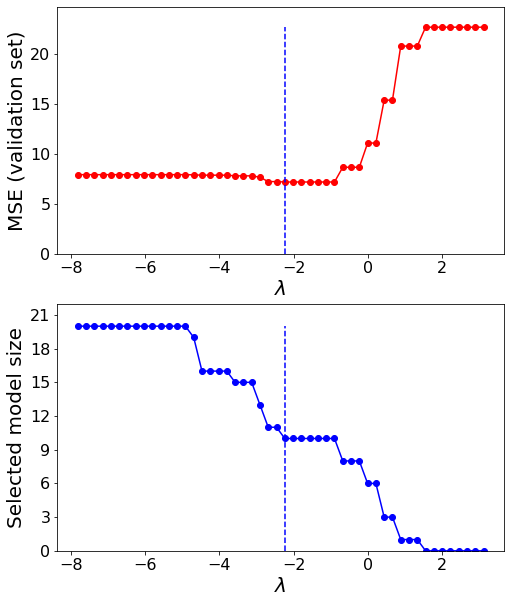

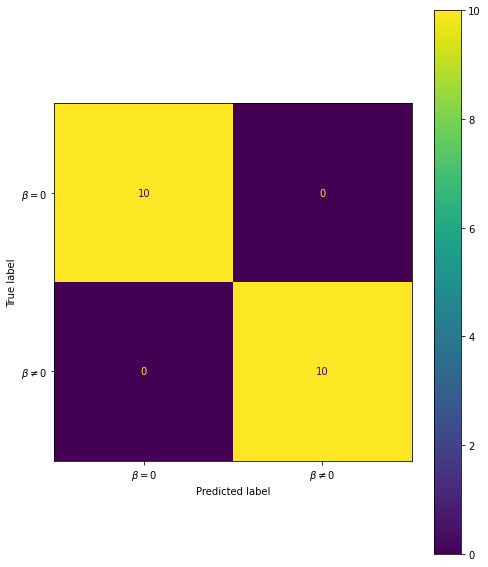

In [9]:
results(beta0, X_train, y_train, lam_grid, s_list, mse_arr)